In [ ]:
!pip install lime
!pip install seaborn
!pip install lifelines

     |████████████████████████████████| 276kB 5.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=86eb2ffca1e4a09aa68e32af26df3a9b8a28f6233cfc18ec503b61a0d29acec9
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 358kB 6.6MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4050 sha256=1ad27ad52f50540b2d29b8b21abb06317486401d7fcab19a7e7b455fc3c82d8c
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


Sex values as string: Male      5822
Female    1397
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SEX VALUES AS BINARY: 0    5822
1    1397
Name: sex, dtype: int64
CHARGE VALUES AS STRING:  F    4670
M    2549
Name: c_charge_degree, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CHARGE VALUES AS BINARY:  1    4670
0    2549
Name: c_charge_degree, dtype: int64
7219
last date of modified dataset:  2014-03-31 length of compas:  6212
Null values:  False Sum:  sex                  0
age                  0
isAfricanAmerican    0
isCaucasian          0
isHispanic           0
isAsian              0
isOther              0
isNativeAmerican     0
juv_fel_count        0
juv_misd_count       0
priors_count         0
c_charge_degree      0
dtype: int64
6212
MEAN OF SCALED DATA:  [-3.66023302e-17  1.99025171e-16  1.40690207e-16  9.15058256e-18
  5.71911410e-18  1.94449879e-17  1.83011651e-17  2.28764564e-17
  4.06057101e-17 -1.94449879e-17  2.28764564e-17 -7.93527081e-17]
STANDARD DEVIATION OF SCALED DATA [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
6212
Null values:  False Sum:  sex                  0
age                  0
isAfricanAmerican    0
isCaucasian          0
isHispanic           0
isAsian              0
isOther              0
isNativeAmerican     0
juv_fel_count        

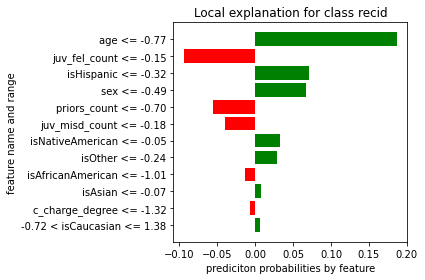

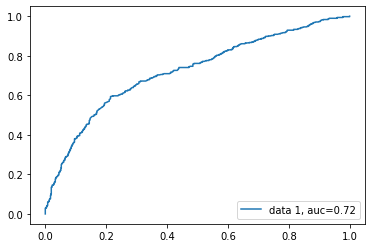

Mean validation accuracy/loss:  69.23257000000001 stddev:  1.215355707231426 Confidence Interval:  0.07532852716186716
0.6959111397295557


In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
import pickle
import datetime
from datetime import timedelta
import scipy.stats as st
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

compas = pd.read_csv("result3.csv")

predict = 'is_recid'
total = len(compas)
#Encode sex values
print("Sex values as string:", compas['sex'].value_counts())
for i in range(total):
  if compas['sex'][i] == 'Male':
    compas['sex'][i] = 0
  if compas['sex'][i] == 'Female':
    compas['sex'][i] = 1
print("SEX VALUES AS BINARY:",compas['sex'].value_counts())
#Encode charge degree values
print("CHARGE VALUES AS STRING: ", compas['c_charge_degree'].value_counts())
for i in range(total):
  if compas['c_charge_degree'][i] == 'M':
    compas['c_charge_degree'][i] = 0
  if compas['c_charge_degree'][i] == 'F':
    compas['c_charge_degree'][i] = 1
print("CHARGE VALUES AS BINARY: ", compas['c_charge_degree'].value_counts())
print(total)
for i in range(len(compas)):
  if pd.to_datetime(compas["compas_screening_date"][i]) >= datetime.datetime(2014, 4, 1):
    compas = compas.drop([i])
print("last date of modified dataset: ", compas["compas_screening_date"].max(), "length of compas: ", len(compas))

compasfeat = compas.drop(['id', 'name', 'first', 'last','race','decile_score', 'juv_other_count','v_decile_score','compas_screening_date','dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out',
                        'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas','c_charge_desc', 'r_case_number','r_charge_degree','is_recid',
                        'r_days_from_arrest', 'r_offense_date','r_charge_desc', 'r_jail_in','r_jail_out','is_violent_recid','two_year_recid', 'priors_count.1',
                        'decile_score.1','vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment','score_text', 
                        'screening_date', 'v_type_of_assessment', 'v_score_text', 'raceNum','v_screening_date', 'violent_recid', 'in_custody','out_custody','start','end','event' ], axis=1)

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())

x = np.array(compasfeat)
y = np.array(compas[predict])


print(len(compasfeat))
scaler = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

epochs= 1000
print("MEAN OF SCALED DATA: ", x.mean(axis=0))
print("STANDARD DEVIATION OF SCALED DATA", x.std(axis=0))
print(len(compasfeat))


print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())

linaccuracies= []
best = 0
for _ in range(epochs):
  x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(x, y, test_size=.20)

  #build the model
  linear = linear_model.LogisticRegression(max_iter = 400)
  linear.fit(x_train2, y_train2)
  acc = linear.score(x_test2, y_test2)
  acc = round(acc*100, 2)
  linaccuracies.append(acc)
  if best < acc:
    best = acc
    print(best)


"""#open saved model
opensplitraceLinear = pickle.load(open("splitraceLinear.sav", "rb"))"""
#results
splitraceLinear = 'splitraceLinear.sav'
pickle.dump(linear, open(splitraceLinear, 'wb'))

print(linaccuracies)
linmeans = np.mean(linaccuracies, 0)
linstds = np.std(linaccuracies, 0)
linci95 = 1.96*linstds/np.sqrt(epochs)
linear_matrix = confusion_matrix(y_test2, linear.predict(x_test2))


i = 66
explainer = lime.lime_tabular.LimeTabularExplainer(x_train2, mode='classification', feature_names = compasfeat.columns.values, class_names=['no recid', 'recid'], verbose=True, discretize_continuous=True, discretizer='quartile')
print("Logisitic regression classifier accuracy: ",best, "\nprediction: ", linear.predict(x_test2[i].reshape(1, -1)), "\nPredict probability: ", linear.predict_proba(x_test2[i].reshape(1, -1)), "\nConfusion Matrix:\n", linear_matrix)

print("prisoner information:\n", x_test2[i],y_test2[i])
print("Judges on the features: ", compasfeat.columns)
print("Linear: \n")
exp = explainer.explain_instance(x_test2[i], linear.predict_proba, num_features=len(compasfeat.columns))
#exp.show_in_notebook(show_table=True)
linearimg = exp.as_pyplot_figure()
plt.xlabel('prediciton probabilities by feature')
plt.ylabel('feature name and range')
plt.tight_layout()
linearimg.savefig('splitracelinearexp', format='pdf',bbox_inches='tight')
plt.show()

y_pred_proba = linear.predict_proba(x_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test2, y_pred_proba),2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.savefig('splitraceLRAUC.pdf', format='pdf',bbox_inches='tight')
plt.show()

print("Mean validation accuracy/loss: ", linmeans, "stddev: ", linstds, "Confidence Interval: ",linci95)


In [ ]:
testfeat = compas.drop(['id', 'name', 'first', 'last','decile_score', 'juv_other_count','v_decile_score','compas_screening_date','dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out',
                        'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas','c_charge_desc', 'r_case_number','r_charge_degree','is_recid',
                        'r_days_from_arrest', 'r_offense_date','r_charge_desc', 'r_jail_in','r_jail_out','is_violent_recid','two_year_recid', 'priors_count.1',
                        'decile_score.1','vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment','score_text', 
                        'screening_date', 'v_type_of_assessment', 'v_score_text', 'raceNum','v_screening_date', 'violent_recid', 'in_custody','out_custody','start','end','event' ], axis=1)


x1 = np.array(testfeat)
y1 = np.array(compas[predict])
print(x_test2)
totalresults = linear.predict(x_test2)
print(totalresults)

[[-0.49284598  1.39481523  0.99102546 ... -0.17619442  0.82362962
   0.75805769]
 [-0.49284598 -0.35720862  0.99102546 ... -0.17619442  2.56753049
   0.75805769]
 [-0.49284598 -1.02464627  0.99102546 ... -0.17619442 -0.48429604
   0.75805769]
 ...
 [-0.49284598  0.14336963  0.99102546 ... -0.17619442 -0.70228365
   0.75805769]
 [-0.49284598 -0.60749774 -1.00905581 ... -0.17619442  1.25960483
  -1.31916082]
 [-0.49284598  0.05993992 -1.00905581 ... -0.17619442 -0.48429604
   0.75805769]]
[0 1 0 ... 0 1 0]
